In [1]:
# import matplotlib and style 'fivethirtyeight'
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# import numpy, pandas and datetime
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# save references to measurement table
Measurement = Base.classes.measurement

# save references to measurement table
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

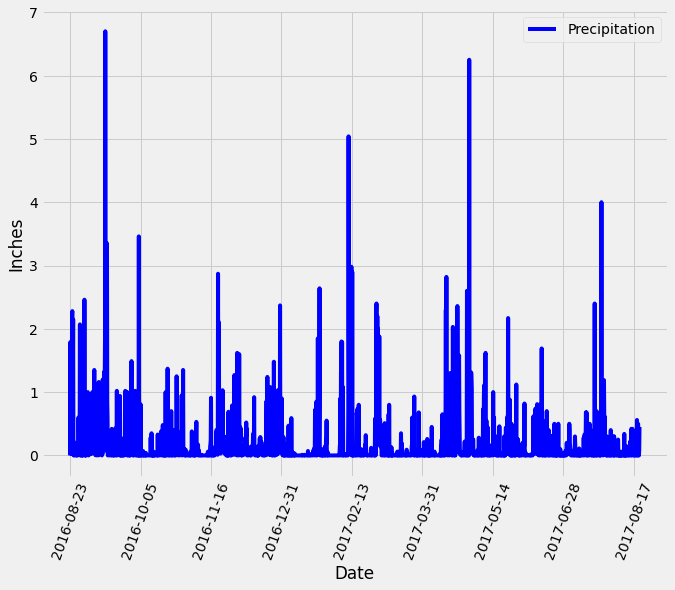

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date
# Calculate the date one year from the last date in data set.
one_year_from_last_date = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_from_last_date
# Perform a query to retrieve the data and precipitation scores
precipitation_scores=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= one_year_from_last_date).all()
precipitation_scores
# Save the query results as a Pandas DataFrame and set the index to the date column, sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation_scores,columns=["Date","Precipitation"]).set_index("Date").sort_index(ascending=True).dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(color = 'blue', figsize = (10,8))
plt.xticks(rotation= 70)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_number_station = session.query(Measurement).group_by(Measurement.station).count()
total_number_station

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station, count in most_active_stations:
    print(f"Station {station} has {count} observations.")

Station USC00519281 has 2772 observations.
Station USC00519397 has 2724 observations.
Station USC00513117 has 2709 observations.
Station USC00519523 has 2669 observations.
Station USC00516128 has 2612 observations.
Station USC00514830 has 2202 observations.
Station USC00511918 has 1979 observations.
Station USC00517948 has 1372 observations.
Station USC00518838 has 511 observations.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
print(f'In station {most_active_station_id}:')
low_high_avg_results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()

# Print the results
print(f"The lowest temperature is {low_high_avg_results[0][0]}")
print(f"The highest temperature is {low_high_avg_results[0][1]}")
print(f"The average temperature is {low_high_avg_results[0][2]}")

In station USC00519281:
The lowest temperature is 54.0
The highest temperature is 85.0
The average temperature is 71.66378066378067


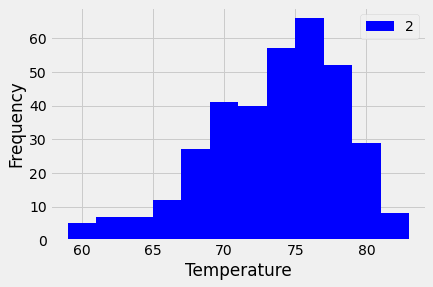

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query the last 12 months of temperature data for the most active station
last_12_months_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_stations[0][0]).filter(Measurement.date > one_year_from_last_date).order_by(Measurement.date).all()

temperature_df=pd.DataFrame(last_12_months_temp)

temperature_df.plot(kind="hist",bins=12, color="blue")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [16]:
# Close Session
session.close()